<a href="https://colab.research.google.com/github/jacibrian/dft-idft-zero_padding/blob/main/Curso_an%C3%A1lisis_radioastronom%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realizado por Jorge Cibrián 20211021058

In [ ]:
# Instalar:
%%capture
!pip install astropy==5.3;
!pip install pyregion;
!pip install photutils;
!pip install regions;
!pip install scipy;
!pip install aplpy;

In [ ]:
# Librerías:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import pyregion
from astropy.coordinates import Angle
from astropy import units as u
from astropy.stats import SigmaClip
from photutils.background import StdBackgroundRMS
from regions import Regions
from pyregion import get_mask
import aplpy
import pandas as pd

# Archivos FITS

In [ ]:
# Importando la carpeta
from google.colab import drive
drive.mount('/content/drive')
pathd = '/content/drive/MyDrive/Imaging/'

Mounted at /content/drive


En la carpeta de archivos fits, seleccionamos el archivo con el que trabajaremos. FITS (Flexible Image Transport System) es el formato de archivo más común para el intercambio de información astronómica. FITS almacena datos como imágenes, espectros electromagnéticos, listas de fotones, cubos de datos y muchos más.

In [ ]:
image_file = pathd+'fits/NGC5258_s_concat_uvt_dot75asec_rbeam1asec_csdot1.pbcor_hcorr.fits'

La clase `aplpy.FITSFigure` nos permite crear un grafico con este archivo FITS:

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -1.018e-04
INFO:astropy:Auto-setting vmax to  5.187e-04


INFO: Auto-setting vmin to -1.018e-04 [aplpy.core]
INFO: Auto-setting vmax to  5.187e-04 [aplpy.core]


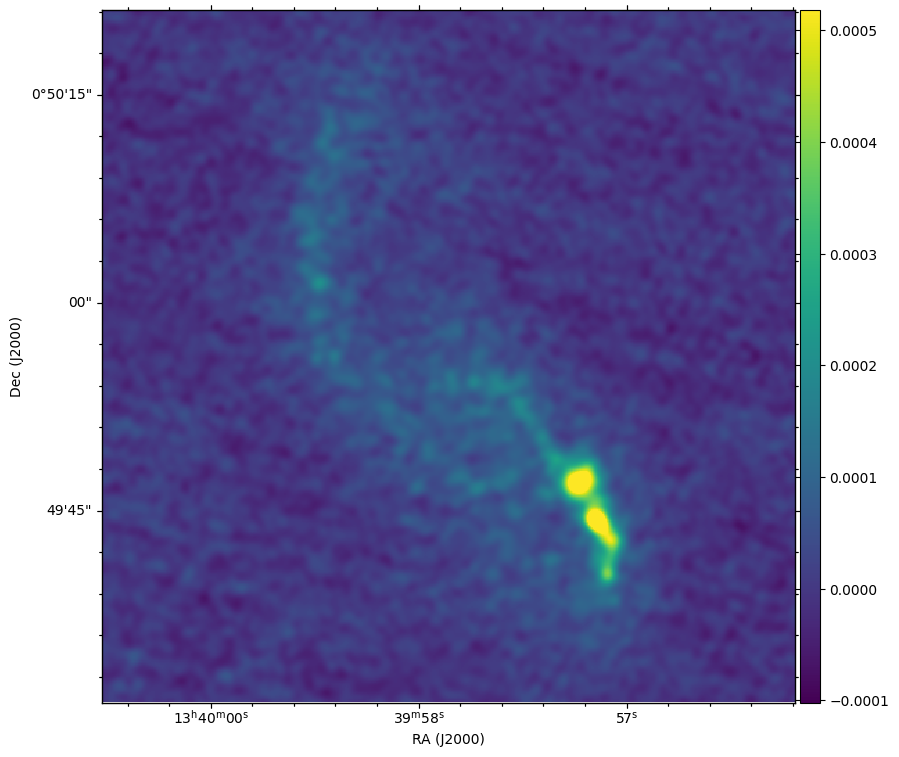

In [ ]:
sDi=aplpy.FITSFigure(image_file)
sDi.show_colorscale()
sDi.add_colorbar()

In [ ]:
#Comprobando el tipo de dato de sDi:

sDi

In [ ]:
# Cargando la imagen utilizando la función fits.open del paquete astropy:
image = fits.open(image_file)[0]
image

In [ ]:
# El encabezado del archivo .fits, que proporciona información importante del archivo
header= image.header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
BMAJ    =   2.777777777778E-04                                                  
BMIN    =   2.777777777778E-04                                                  
BPA     =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'NGC 5257/8'                                                          
BUNIT   = 'Jy/beam '           /Brightness (pixel) unit                         
EQUINOX =   2.000000000000E+03                                                  
RADESYS = 'FK5     '        

In [ ]:
data = image.data
data

array([[-8.42795816e-06, -3.88800254e-06,  8.59378986e-07, ...,
        -1.60543896e-05, -9.20454568e-06, -3.89002980e-06],
       [-6.05034165e-06, -1.99048918e-06,  2.53755479e-06, ...,
        -1.41792461e-05, -7.44180943e-06, -1.89061109e-06],
       [-4.39967926e-06, -6.59264344e-07,  3.81479958e-06, ...,
        -1.35508508e-05, -7.15010765e-06, -1.43404975e-06],
       ...,
       [ 3.28053102e-06,  8.53455276e-06,  1.23046302e-05, ...,
        -1.65220354e-05, -1.59263218e-05, -1.60143027e-05],
       [-4.76962805e-06, -1.61062246e-07,  3.38781524e-06, ...,
        -1.56560654e-05, -1.48928502e-05, -1.47071187e-05],
       [-1.40863476e-05, -1.02853055e-05, -6.93907532e-06, ...,
        -1.26009099e-05, -1.17542404e-05, -1.14344302e-05]], dtype='>f4')

In [ ]:
data.sum()

3.587452

In [ ]:
header= image.header
# header

Caracterización del ruido

In [ ]:
# from astropy.units.cgs import K

vla_image = fits.getdata(image_file)

region_file = pathd + 'Regions/Regions.reg'
region = pyregion.open(region_file)
region

[Shape : circle ( Number(64.194444),Number(169.75),Number(28.958752) ),
 Shape : circle ( Number(76.694444),Number(91.972222),Number(29.84424) ),
 Shape : circle ( Number(152.38889),Number(78.083333),Number(29.958323) ),
 Shape : circle ( Number(345.44444),Number(433.63889),Number(28.258105) ),
 Shape : circle ( Number(422.52778),Number(389.19444),Number(30.302228) ),
 Shape : circle ( Number(425.30556),Number(294.75),Number(30.097001) )]

# Caracterización del ruido

En el procesamiento de datos, es importante calcular el ruido promedio para dejar de tomarlo en cuenta en nuestro análisis. En la recopilación de datos astronómicos, el ruido puede provenir del instrumento, la turbulencia atmosférica y muchos otros factores.

In [ ]:
vla_image = fits.getdata(image_file)

region_file = pathd + 'Regions/Regions.reg'
region = pyregion.open(region_file)
region

[Shape : circle ( Number(64.194444),Number(169.75),Number(28.958752) ),
 Shape : circle ( Number(76.694444),Number(91.972222),Number(29.84424) ),
 Shape : circle ( Number(152.38889),Number(78.083333),Number(29.958323) ),
 Shape : circle ( Number(345.44444),Number(433.63889),Number(28.258105) ),
 Shape : circle ( Number(422.52778),Number(389.19444),Number(30.302228) ),
 Shape : circle ( Number(425.30556),Number(294.75),Number(30.097001) )]

Ruido promedio:

In [ ]:
  rms_values = []
  for K in range(len(region)):
    region = pyregion.open(region_file)
    m=len(region)
    del region[0:K]
    del region[1:m]

    mask = region.get_mask(shape=(vla_image.shape[0],vla_image.shape[1]),header=header)
    #mask = get_mask(region,data)
    maskdata= np.multiply(vla_image,mask)
    N=len(maskdata[maskdata!=0])
    rms_values.append(np.sqrt(np.sum(maskdata**2)/N))
  avg_rms = np.mean(rms_values)
  avg_rms

1.8595798640995463e-05

In [ ]:
#maskdata= np.multiply(vla_image,mask[0])
#maskdata[maskdata!=0]
mask[1][mask[1]==True]
mask.shape

(500, 500)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.


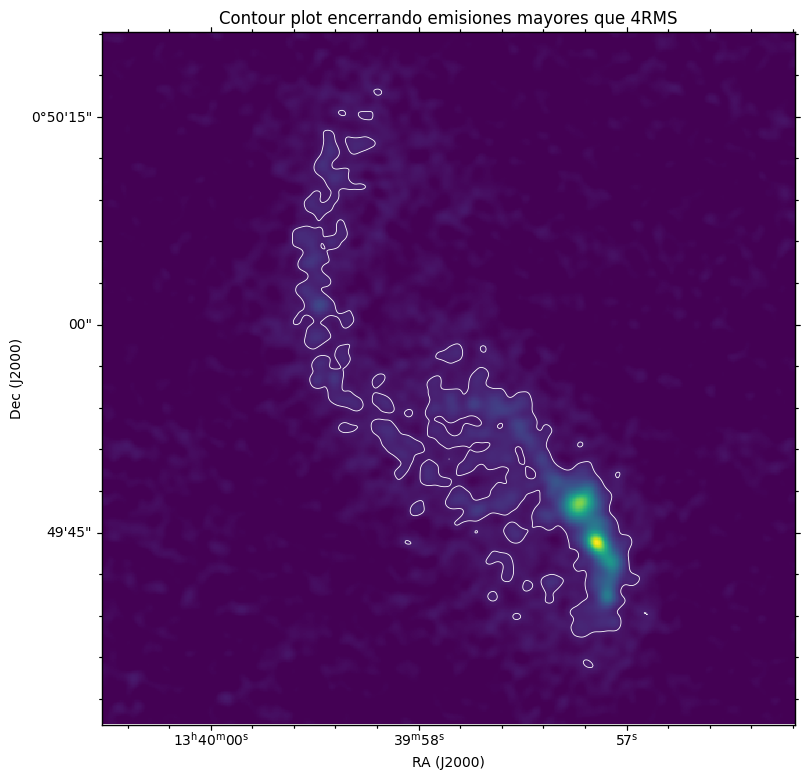

In [ ]:
fig = aplpy.FITSFigure(image_file)
fig.show_colorscale(vmin=0, vmax=np.max(vla_image), stretch='linear')
fig.show_contour(data=vla_image, levels=[4*avg_rms], colors=['white'], linewidths=0.6)
fig.set_title('Contour plot encerrando emisiones mayores que 4RMS')

#Fotometría



Esta en una técnica utilizada en astronomía que se enfoca en medir el flujo o intensidad de luz emitida por objetos astronómicos.

In [ ]:
# bmaj, bmin y cdelt1
bmaj_deg = header['BMAJ']
bmin_deg = header['BMIN']
pixel_size_deg = header['CDELT1']

# Area del haz en grados cuadrados
area_deg2 = np.pi * bmaj_deg * bmin_deg / (4 * np.log(2))

# Pasando desde grados cuadrados a pixeles
pixel_area_deg2 = pixel_size_deg**2
area_pixels = area_deg2 / pixel_area_deg2

print("Area del haz en pixeles:", area_pixels)

Area del haz en pixeles: 113.30900354567986


In [ ]:
# Los pixeles significativos son los de emision mayor a 3*sigma (3RMS)
significant_pixels = vla_image[vla_image > 3 * avg_rms]

# Emision total en Jy sumando los pixeles significativos
total_emission_jy = np.sum(significant_pixels)

print("Emision total de la galaxia en Jy:", total_emission_jy)


Emision total de la galaxia en Jy: 3.0008967


La luminosidad es el flujo externo total de energia desde un cuerpo radiante por unidad de tiempo, en todas direcciones y toda longitud de onda.

In [ ]:
# distancia en parsecs
distance_parsecs=98e6
# en cm:
distance_cm= distance_parsecs*3.086e18
# emision total:
total_emission_erg= (total_emission_jy/area_pixels)*1e-23
#luminosidad solar:
solarluminosity= 3.827e33
total_luminosity_solar= total_emission_erg*4*np.pi*distance_cm**2/solarluminosity

print("Luminosidad total en luminosidades solares:",total_luminosity_solar)

Luminosidad total en luminosidades solares: 7.953934698838102e-05


# Cubos de datos

Un cubo de datos es un conjunto multidimensional de datos. En este caso, un conjunto tridimensional que contiene información espacial (ascensión recta y declinación galáctica) en dos de sus ejes e información espectral en el tercero. Esto nos permite visualizar la emisión a diferentes frecuencias proveniente de un único objeto.

In [ ]:
image2= fits.open('/content/drive/MyDrive/Imaging/fits/NGC_5258_cube_1arcsec_inregion.pbcor_hcorr.fits')[0]
image2

#data y header
cube_data = image2.data
cube_header = image2.header

In [ ]:
print("Forma del cubo de datos que se mostrará en píxeles:", cube_data.shape)  # (n_channels, n_y_pixels, n_x_pixels)

n_channels = cube_header['NAXIS3']
n_y_pixels = cube_header['NAXIS2']
n_x_pixels = cube_header['NAXIS1']

Forma del cubo de datos que se mostrará en píxeles: (250, 500, 500)


In [ ]:
# Header completo:
print(cube_header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  500                                                  NAXIS2  =                  500                                                  NAXIS3  =                  250                                                  BMAJ    =   0.0002777777777778                                                  BMIN    =   0.0002777777777778                                                  BPA     =                  0.0                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'NGC_5258'                                                            BUNIT   = 'Jy/beam '                                                            RADESYS = 'ICRS    '                    

In [ ]:
V_d        = (1-cube_header['CRVAL3']/cube_header['RESTFRQ'])*2.99999e5                                                   #converts central freq to velocity
V_u        = (1-(cube_header['CRVAL3']+cube_header['CDELT3']*cube_header['NAXIS3'])/cube_header['RESTFRQ'])*2.99999e5     # calculates the lower frequency
deltaV     = (V_u-V_d)/cube_header['NAXIS3']

In [ ]:
V_d, V_u, deltaV

(5548.820227517398, 6799.681414953371, 5.003444749743893)

Visualizando los canales del cubo de datos cambiando el parámetro `channel index`:

In [ ]:
print('El número de canales en el cubo es: ' + str(n_channels))

El número de canales en el cubo es: 250


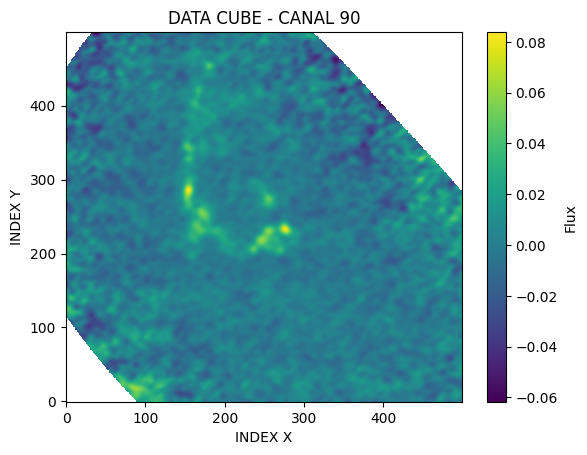

In [ ]:
# Visualizando una porcion del cubo en el canal 90:

channel_index = 90
plt.imshow(cube_data[channel_index], origin='lower', cmap='viridis', aspect='auto')

#set labels
plt.xlabel('INDEX X')
plt.ylabel('INDEX Y')
plt.title(f'DATA CUBE - CANAL {channel_index}')

#show the figure of cube
plt.colorbar(label='Flux')

Aquí podemos ver parte de la emisión originada desde la galaxia a la velocidad correspondiente en ese segmento.

In [ ]:
# Usando las aperturas creadas en ds9 como regiones, generamos un perfil para cada región y creamos un gráfico para cada una.
from astropy.units.cgs import K

image_cube = '/content/drive/MyDrive/Imaging/fits/NGC_5258_cube_1arcsec_inregion.pbcor_hcorr.fits'
vla_cube = fits.getdata(image_cube)

region_cube = pathd + 'Regions/guide_2Dimage'
region1 = pyregion.open(region_cube)
region1

[Shape : circle ( Number(167),Number(320),Number(20) ),
 Shape : circle ( Number(360),Number(125),Number(20) ),
 Shape : circle ( Number(342),Number(160),Number(20) ),
 Shape : circle ( Number(249),Number(224),Number(20) ),
 Shape : circle ( Number(305),Number(210),Number(20) ),
 Shape : circle ( Number(188),Number(265),Number(20) ),
 Shape : circle ( Number(164),Number(385),Number(20) )]

# Líneas de emisión

In [ ]:
# Extrayendo la informacion de la frecuencia desde el encabezado
frequency = cube_header['CRVAL3'] + (np.arange(cube_header['NAXIS3']) - cube_header['CRPIX3'] + 1) * cube_header['CDELT3']

In [ ]:
# coordenadas de regiones:
x, y, radius = 167, 320, 20
x1,y1,radius1= 360, 125, 20
x2,y2,radius2= 342, 160, 20
x3,y3,radius3= 249,224,20
x4,y4,radius4= 305,210,20
x5,y5,radius5= 188,265,20
x6,y6,radius6= 164,385,20

Definiendo funciones para crear una máscara circular, calcular las líneas de emisión y graficarla.

In [ ]:
# para mascara circular:
def generate_circular_mask(shape, center_x, center_y, radius):
    y, x = np.ogrid[:shape[0], :shape[1]]
    masko = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    return masko

# para calcular las lineas de emeision
def calculate_emission_line(masko):
    spectrum = np.nanmean(vla_cube[:, masko], axis=1)
    return frequency, spectrum

# para graficas las lineas de emeision
def plot_emission_line(region, frequency, spectrum):
    plt.figure(figsize=(8, 5))
    plt.plot(frequency, spectrum, label='Region {}'.format(region))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux Density (K)')
    plt.title('Emission Line Profile for {}'.format(region))
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Generando la mascara circular en la region definida anteriormente:
masko = generate_circular_mask(vla_cube.shape[1:], x, y, radius)
masko1 = generate_circular_mask(vla_cube.shape[1:], x1, y1, radius1)
masko2= generate_circular_mask(vla_cube.shape[1:], x2, y2, radius2)
masko3 = generate_circular_mask(vla_cube.shape[1:], x3, y3, radius3)
masko4 = generate_circular_mask(vla_cube.shape[1:], x4, y4, radius4)
masko5 = generate_circular_mask(vla_cube.shape[1:], x5, y5, radius5)
masko6 = generate_circular_mask(vla_cube.shape[1:], x6, y6, radius6)

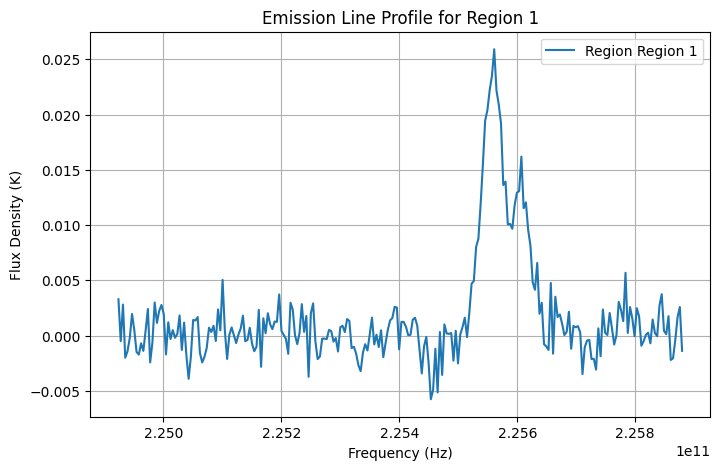

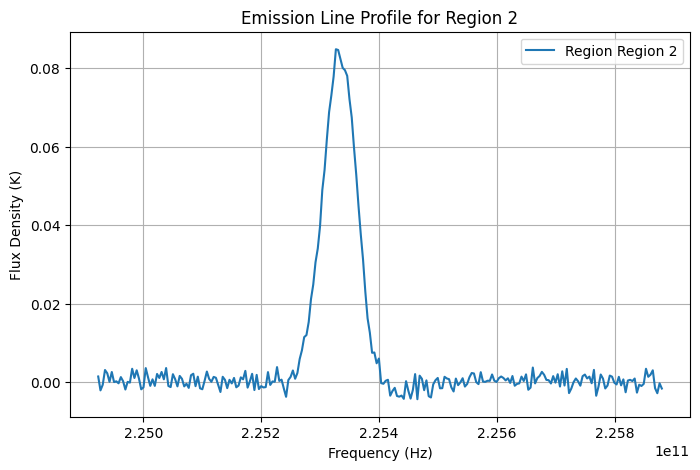

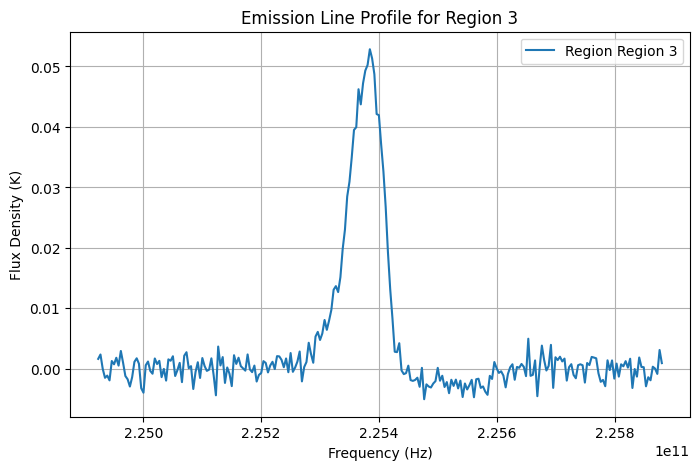

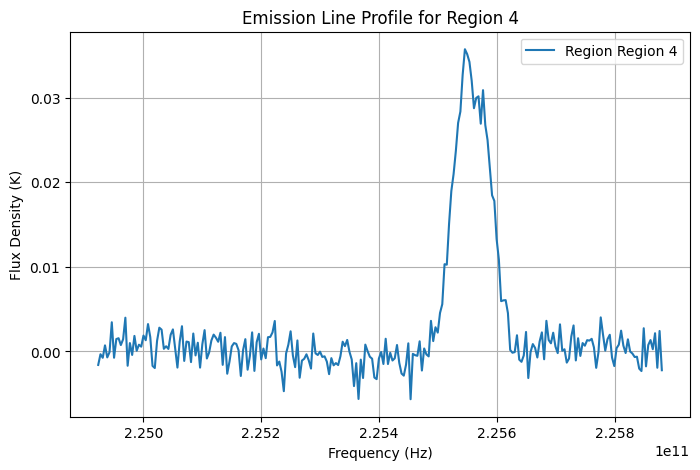

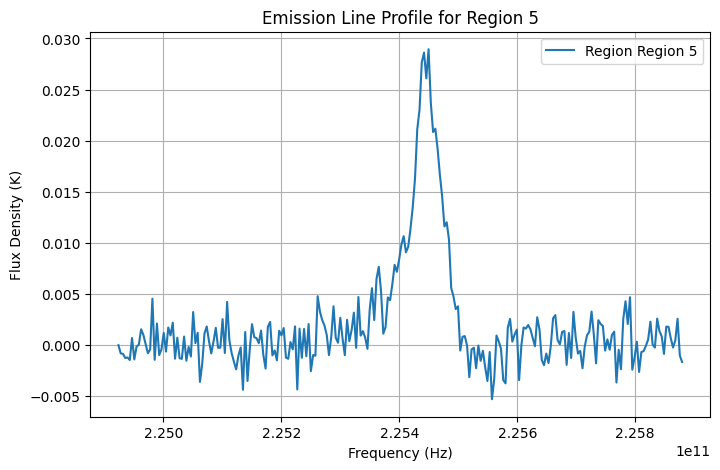

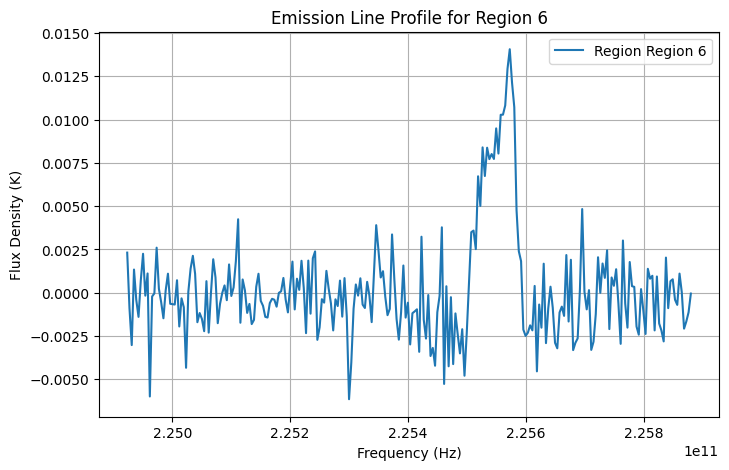

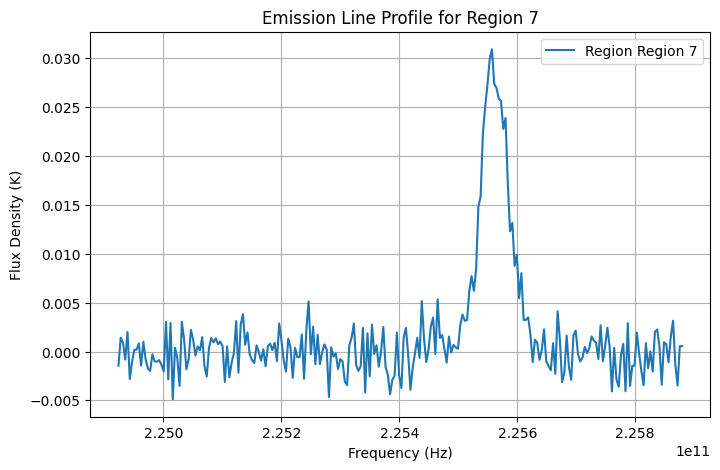

In [ ]:
# Calculando y graficando la linea de emision para cada una de las regiones:

frequency, spectrum = calculate_emission_line(masko)
plot_emission_line('Region 1', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko1)
plot_emission_line('Region 2', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko2)
plot_emission_line('Region 3', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko3)
plot_emission_line('Region 4', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko4)
plot_emission_line('Region 5', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko5)
plot_emission_line('Region 6', frequency, spectrum)

frequency, spectrum = calculate_emission_line(masko6)
plot_emission_line('Region 7', frequency, spectrum)

# Mapas de momento

In [ ]:
# funcion para calcular rms:
def rms_function(array):
    N = len(array)
    rms = np.sqrt(np.sum(array**2)/N)
    return rms

# funcion para hacer recorte (clipping):
def clipper(array,rms, pb_mask):
    clipped_array = np.zeros([array.shape[0],array.shape[1],array.shape[2]])
    for k in range(0,array.shape[0],1):
        array[k,:,:] = np.multiply(pb_mask,array[k,:,:])
        for i in range(0,array.shape[1],1):
            for j in range(0,array.shape[2],1):
                if array[k,i,j] >= rms:
                    clipped_array[k,i,j] = array[k,i,j]
                else:
                    clipped_array[k,i,j] = 0
    return clipped_array

# función que devuelve los momentos:
def moments(cube,factor, pb_mask):
    cube_data    = cube.data
    header       = cube.header
    cube_data    = np.nan_to_num(cube_data)
    del header['HISTORY']

    v = cube_data.shape[0]
    x = cube_data.shape[1]
    y = cube_data.shape[2]
    V_d        = (1-header['CRVAL3']/header['RESTFRQ'])*2.99999e5                                         #converts central freq to velocity
    V_u        = (1-(header['CRVAL3']+header['CDELT3']*header['NAXIS3'])/header['RESTFRQ'])*2.99999e5     # calculates the lower frequency
    deltaV     = (V_u-V_d)/header['NAXIS3']

    slice_1    = cube_data[4,:,:]
    slice_2    = cube_data[-4,:,:]

    # npixels =

    rms        = 0.5*(rms_function(slice_1)+rms_function(slice_2))    #correct dividing by no of pixels in a beam

    cube_data  = clipper(cube_data,factor*0.008,pb_mask)

    v_axis     = np.linspace(0,v-1,v,dtype=int)
    M0   = np.zeros([x,y])
    M1   = np.zeros([x,y])
    M2   = np.zeros([x,y])
    vl   = np.linspace(V_d,V_u,v)
    for i in range(0,x,1):
        for j in range(0,y,1):
            M0[i,j] = scipy.integrate.simps(cube_data[:,i,j],v_axis)*deltaV
            M1[i,j] = (scipy.integrate.simps(vl*cube_data[:,i,j],v_axis)*deltaV)/M0[i,j]
            M2[i,j] = np.sqrt((scipy.integrate.simps(cube_data[:,i,j]*(vl-M1[i,j])**2,v_axis)*deltaV)/M0[i,j])


    new_header          = header
    new_header['NAXIS'] = 2
    del new_header['NAXIS3']
    del new_header['CTYPE3']
    del new_header['CRVAL3']
    del new_header['CDELT3']
    del new_header['CRPIX3']
    del new_header['CUNIT3']
    del new_header['PC4_1']
    del new_header['PC4_2']
    del new_header['PC1_4']
    del new_header['PC2_4']
    del new_header['PC4_4']

    mom_0 = fits.PrimaryHDU(M0.astype('float'), new_header)
    mom_1 = fits.PrimaryHDU(M1.astype('float'), new_header)
    mom_2 = fits.PrimaryHDU(M2.astype('float'), new_header)
    return mom_0,mom_1,mom_2

In [ ]:
# mascara alrededor de la galaxia para eliminar los bordes ruidosos:
import pyregion
a = """image \npolygon({},{},{},{},{},{},{},{},{},{},{},{},{},{})""".format(72,379, 72,212,228,8,452 ,8, 452,245, 215,489,121,489 )
region = []
region.append(a)
r = pyregion.parse(region[0])
envelope_mask      = r.get_mask(shape=[500, 500])

In [ ]:
# Calculando los momentos a partir del archivo FITS:
import scipy as sp
import scipy.ndimage
cube         = fits.open('/content/drive/MyDrive/Imaging/fits/NGC_5258_cube_1arcsec_inregion.pbcor_hcorr.fits')[0]
moment_0, moment_1, moment_2 = moments(cube,5,envelope_mask)

<ipython-input-33-8e864bf95b10>:50: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  M0[i,j] = scipy.integrate.simps(cube_data[:,i,j],v_axis)*deltaV
<ipython-input-33-8e864bf95b10>:51: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  M1[i,j] = (scipy.integrate.simps(vl*cube_data[:,i,j],v_axis)*deltaV)/M0[i,j]
<ipython-input-33-8e864bf95b10>:51: RuntimeWarning: invalid value encountered in scalar divide
  M1[i,j] = (scipy.integrate.simps(vl*cube_data[:,i,j],v_axis)*deltaV)/M0[i,j]
<ipython-input-33-8e864bf95b10>:52: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  M2[i,j] = np.sqrt((scipy.integrate.simps(cube_data[:,i,j]*(vl-M1[i,j])**2,v_axis)*deltaV)/M0[i,j])


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -7.729e-01
INFO:astropy:Auto-setting vmax to  8.579e+00


INFO: Auto-setting vmin to -7.729e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.579e+00 [aplpy.core]


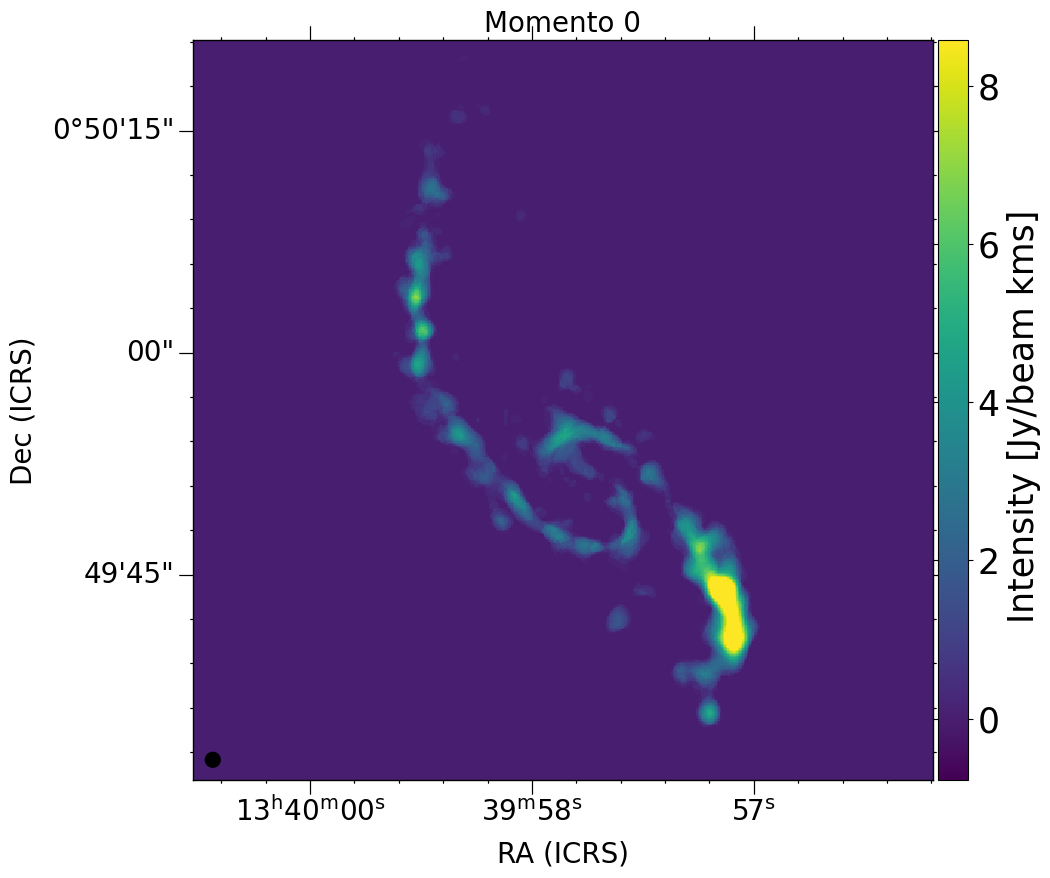

In [ ]:
# Gráfica del momento 0:
fig = aplpy.FITSFigure(moment_0, figsize=(10, 10))
fig.set_title('Momento 0',fontsize=20)
fig.show_colorscale(cmap='viridis')
fig.add_colorbar()
fig.colorbar.set_location('right')
fig.colorbar.set_width(0.3)
fig.colorbar.set_font(size='25')
fig.colorbar.set_axis_label_text('Intensity [Jy/beam kms] ')
fig.colorbar.set_axis_label_font(size=25)
fig.axis_labels.set_font(size=20)
fig.tick_labels.set_font(size=20)
fig.ticks.set_length(10)
fig.add_beam()
fig.beam.set_color('black')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.


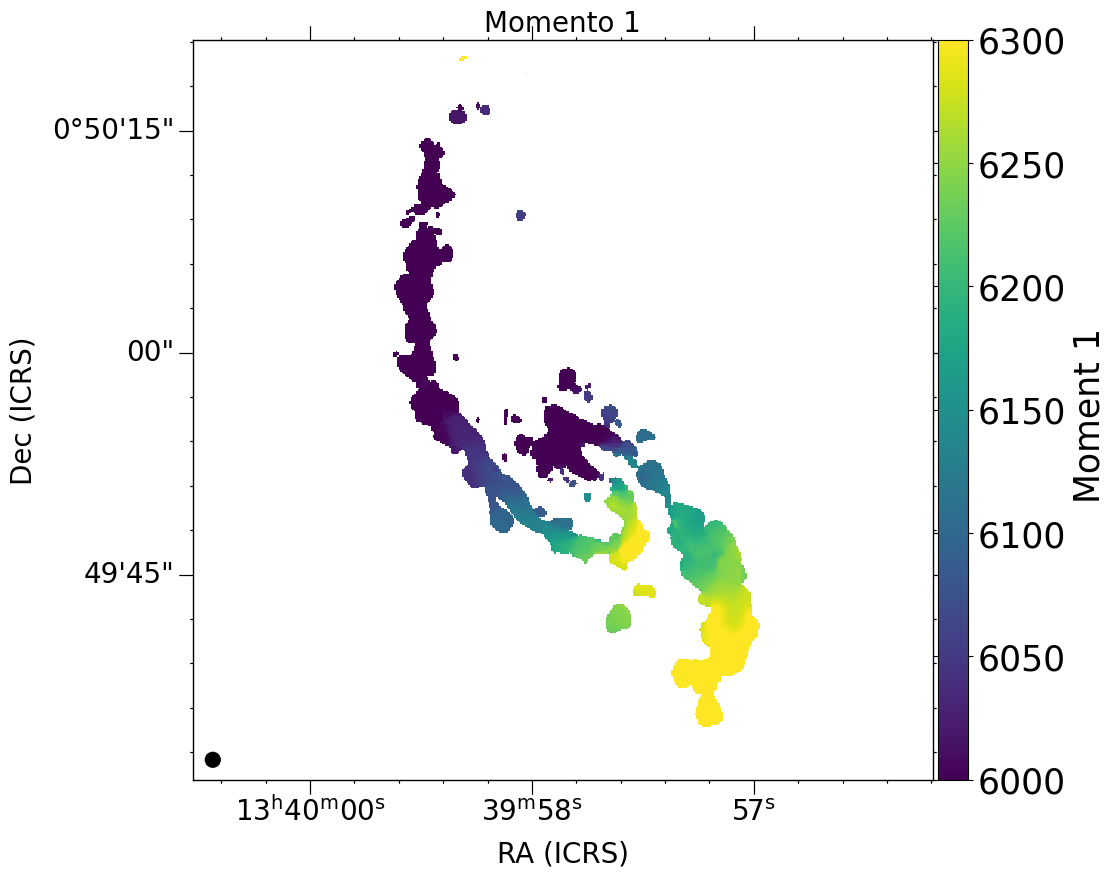

In [ ]:
# Gráfica del momento 1:
fig = aplpy.FITSFigure(moment_1, figsize=(10, 10))
fig.set_title('Momento 1',fontsize=20)
fig.show_colorscale(cmap='viridis',vmin=6000,vmax = 6300)
fig.add_colorbar()
fig.colorbar.set_location('right')
fig.colorbar.set_width(0.3)
fig.colorbar.set_font(size='25')
fig.colorbar.set_axis_label_text('Moment 1 ')
fig.colorbar.set_axis_label_font(size=25)
fig.axis_labels.set_font(size=20)
fig.tick_labels.set_font(size=20)
fig.ticks.set_length(10)
fig.add_beam()
fig.beam.set_color('black')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.


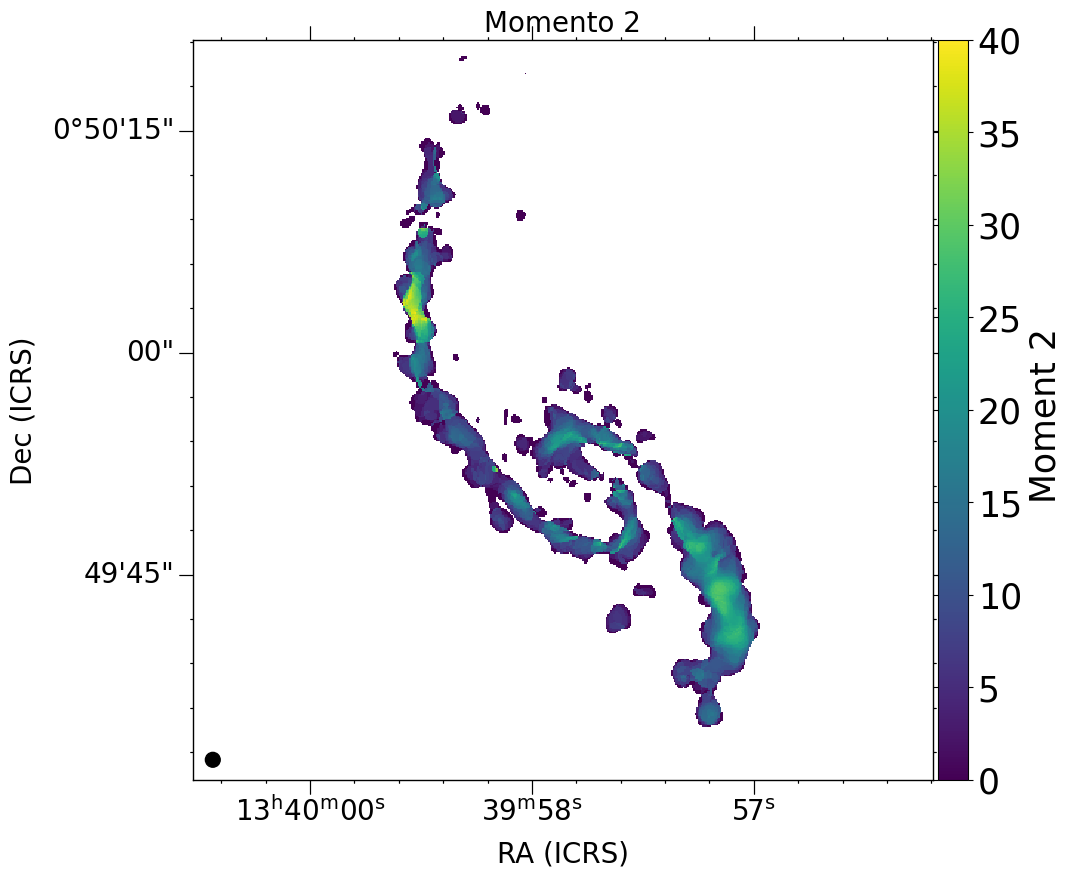

In [ ]:
# Gráfica del momento 2:
fig = aplpy.FITSFigure(moment_2, figsize=(10, 10))
fig.set_title('Momento 2',fontsize=20)
fig.show_colorscale(cmap='viridis',vmin=0,vmax = 40)
fig.add_colorbar()
fig.colorbar.set_location('right')
fig.colorbar.set_width(0.3)
fig.colorbar.set_font(size='25')
fig.colorbar.set_axis_label_text('Moment 2 ')
fig.colorbar.set_axis_label_font(size=25)
fig.axis_labels.set_font(size=20)
fig.tick_labels.set_font(size=20)
fig.ticks.set_length(10)
fig.add_beam()
fig.beam.set_color('black')